# Exploratory Data Analysis (EDA)

In [1]:
# importing needed libraries
import pandas as pd
import numpy as np

In [2]:
# loading the iris dataset
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
# type of the iris object
type(iris)

sklearn.utils.Bunch

In [4]:
# exploring inside the iris object
iris.keys()
# or use dir(iris), it returns the keys as a list
# dir(iris)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
# DESCRiption of the iris dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
# shape of the data
n_sample, n_features = iris.data.shape
print("sample:",n_sample,"\nfeature:",n_features)
print(iris.data.shape)

sample: 150 
feature: 4
(150, 4)


In [7]:
# feature names
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
# storing feature matrix to 'X'
X = iris.data

In [9]:
# storing target vector to 'y'
y = iris.target

# Data visualization

In [10]:
# importing visualization packages
%matplotlib inline
import seaborn as sns

In [11]:
# Loading iris dataset in seaborn
# fact: its a enbedded inside the package!!
iris = sns.load_dataset("iris")

In [12]:
# correlation heatmap
correlation = iris.corr()
correlation

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

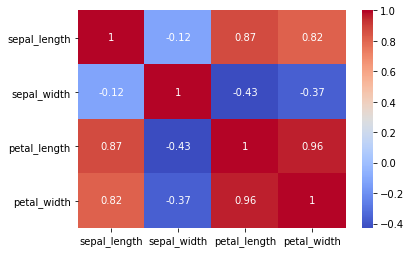

In [13]:
# determining strong positive correlation
sns.heatmap(correlation, cmap="coolwarm", annot=True)

In [14]:
# Visualizing data in a Scatter plot + best fit line
sns.set(style="whitegrid", color_codes=True)

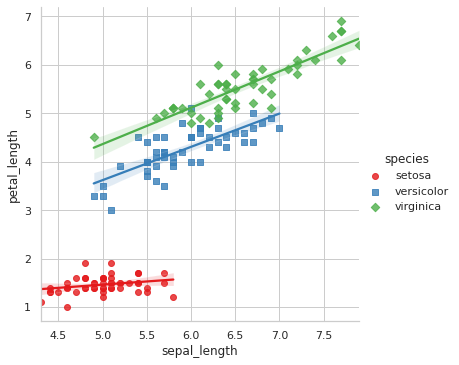

In [15]:
sns.lmplot(x="sepal_length", y="petal_length", hue="species", data=iris, palette="Set1", markers=["o", "s", "D"])

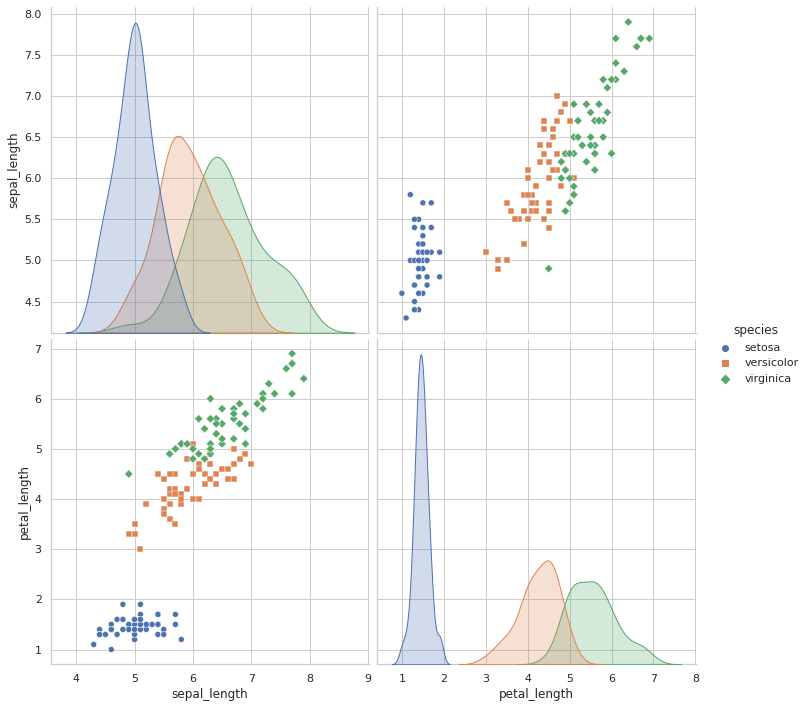

In [16]:
sns.pairplot(iris, height=5, vars=["sepal_length", "petal_length"], \
             markers=["o", "s", "D"], hue="species")

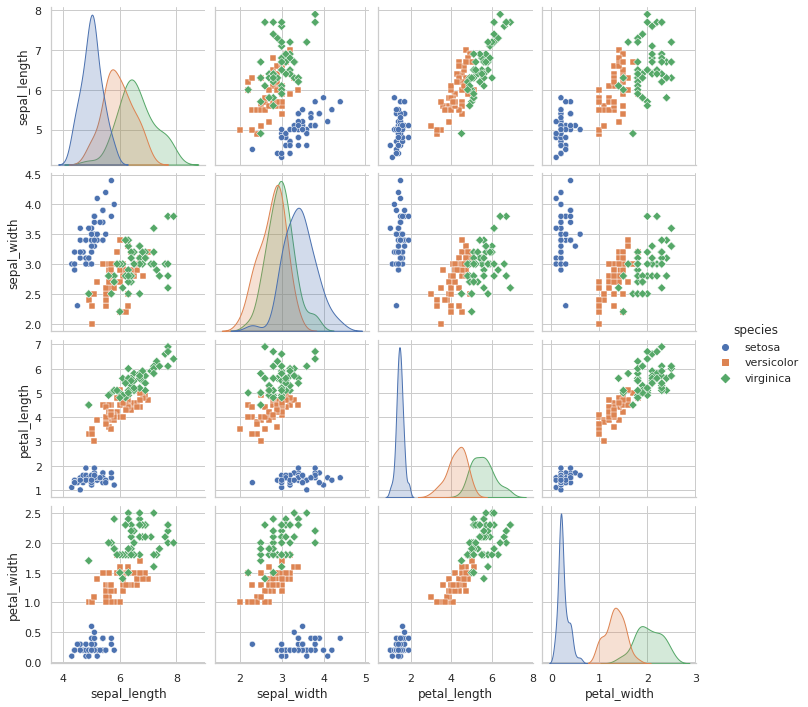

In [17]:
# 16 pair plots
sns.pairplot(iris, markers=["o", "s", "D"], hue="species")


<AxesSubplot:>

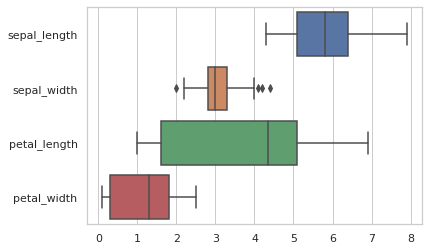

In [18]:
# boxplot
sns.boxplot(data = iris, orient = "h")


# sklearn Estimator

In [19]:
# importing knn estimator
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn = KNeighborsClassifier(n_neighbors=1)

In [53]:
print(knn)

KNeighborsClassifier(n_neighbors=1)


In [54]:
# fitting data into knn model
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [55]:
# knn predict
knn.predict([[3, 5, 4, 2]])

array([2])

In [56]:
# knn predict with label
iris = datasets.load_iris()
print("Predicted target name:",
       iris['target_names'][knn.predict([[3, 5, 4, 2]])])

Predicted target name: ['virginica']


In [57]:
X_new = np.array([[3, 5, 4, 2], [5, 4, 3, 2]])
knn.predict(X_new)

array([2, 1])

In [58]:
# here k = 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
knn.predict(X_new)

array([1, 1])

In [62]:
# Using logical regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", max_iter=10000)
X = iris.data
y = iris.target
lr.fit(X, y)
lr.predict(X_new)

array([0, 0])

In [63]:
knn = KNeighborsClassifier(n_neighbors=5)
# মডেলের মধ্যে সম্পৰ্ক তৈরি করি 
knn.fit(X, y)
# X এর মধ্যে যে ভ্যালুগুলো আছে সেগুলোর রেসপন্স ভ্যালু প্রেডিক্ট করি  
knn.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [64]:
# প্রথম পাঁচটা প্রেডিকশন 
knn.predict(X)[0:5]

array([0, 0, 0, 0, 0])

In [65]:
# y_pred তে প্রেডিক্টেড রেসপন্স ভ্যালুগুলোকে স্টোর করি 
y_pred = knn.predict(X)

# আমরা কতগুলো আইটেম প্রেডিক্ট করলাম?
len(y_pred)

150

In [66]:
knn.score(X, y)

0.9666666666666667

In [67]:
from sklearn.metrics import accuracy_score
import numpy as np
y_true = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 2])
y_pred1 = np.array([0, 0, 0, 1, 1, 1, 2, 2 , 2, 0])
accuracy_score(y_true, y_pred1)

0.9

In [68]:
# compute classification accuracy for the logistic regression model
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.9666666666666667


In [69]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0


In [70]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred)

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])

# Training a more Generalistic Model

In [71]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [78]:
print(X_train.shape)
print(y_test.shape)

(90, 4)
(60,)


In [81]:
# আগের মতো KNeighborsClassifier ইমপোর্ট করি 
from sklearn.neighbors import KNeighborsClassifier
# মডেলকে ইনস্ট্যানশিয়েট করলাম 
# যদি "কে-নিয়ারেস্ট নেইবার্স" ক্লাসিফায়ারের নেইবার ৩ হয়
knn = KNeighborsClassifier(n_neighbors=3)
# মডেলের মধ্যে সম্পৰ্ক তৈরি করি X_train এবং y_train দিয়ে
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [82]:
# প্রেডিকশন করছি টেস্ট সেট ধরে 
y_pred = knn.predict(X_test)
# প্রেডিক্টেড রেসপন্স ভ্যালুর (y_pred) সাথে তুলনা করছি 
# আসল রেসপন্স ভ্যালু (y_test)কে 
# আগের মতো ইমপোর্ট করলাম metricsকে 
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.9333333333333333


In [83]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


In [84]:
# যোগ করে নেই আগের অংশগুলো 
# শুরুতে লোড করে নেই আইরিস ডেটাসেট 
from sklearn.datasets import load_iris
iris = load_iris()

# ফিচার আর টার্গেট রেসপন্স চলে যাচ্ছে X এবং y
X = iris.data
y = iris.target

# STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

In [85]:
# আমরা K=1 থেকে K=25 লুপ চালিয়ে সেটাকে রেকর্ড করি 
neighbors_settings = list(range(1, 26))
scores = []
for k in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

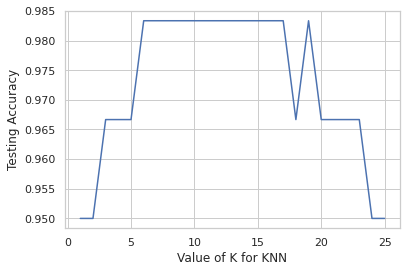

In [86]:
# Matplotlibকে ইমপোর্ট করে নিয়ে আসি (আমাদের সাইন্টিফিক প্লটিং লাইব্রেরি)
import matplotlib.pyplot as plt

# আমাদের জুপিটার নোটবুকে ইনলাইনে দেখানোর জন্য 
%matplotlib inline

# আমরা K এবং "testing accuracy" এর সম্পর্ক প্লট করছি 
plt.plot(neighbors_settings, scores)
# লেবেলের জন্য 
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [87]:
# এখানে দেখছি ৭ থেকে ১৭ পর্যন্ত অ্যাক্যুরেসি ভালো, টেস্ট করছি ১০ দিয়ে 
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9833333333333333


In [88]:
# নেইবার্স ১০ ধরলাম 
knn = KNeighborsClassifier(n_neighbors=10)

# মডেলকে ট্রেইন করতে হবে X এবং y দিয়ে (X_train, y_train নয়)
knn.fit(X, y)

# প্রেডিক্ট করি নতুন স্যাম্পল দিয়ে 
knn.predict([[3, 5, 4, 2]])

array([1])

In [89]:
print("Predicted target name:",
       iris['target_names'][knn.predict([[3, 5, 4, 2]])])

Predicted target name: ['versicolor']


# Whole Model in a jupyter-shell :p

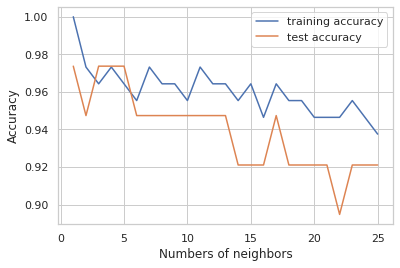

In [90]:

# আগের সব গল্প, শুধু বাড়িয়েছি n_neighbors এর সংখ্যা - ২৫ পর্যন্ত 

from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=4)

from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 25
neighbors_settings = range(1, 26)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))

#নিচের প্লটটা দেখাচ্ছে ট্রেনিং এবং টেস্ট সেটের অ্যাক্যুরেসি 
import matplotlib.pyplot as plt

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Numbers of neighbors")
plt.legend()


# K fold cross validation

In [91]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [92]:
# লোড করে নেই আইরিস ডেটাসেট 
iris = load_iris()  

# তৈরি করে নেই X (ফীচার) এবং y (রেসপন্স)
X = iris.data
y = iris.target

In [94]:
from sklearn.model_selection import cross_val_score

In [95]:
# "কে নিয়ারেস্ট নেইবার" K=5, n_neighbors হচ্ছে প্যারামিটার + "কে ফোল্ড" ক্রস ভ্যালিডেশন এর cv=10
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [96]:
# গড় করি সবগুলোর "আউট অফ স্যাম্পল" অ্যাক্যুরেসি পেতে 
print(scores.mean())

0.9666666666666668


In [97]:
# "কে নিয়ারেস্ট নেইবার" কতো হলে মডেলটা অপটিমাইজড হয়? ১ থেকে ৩১ পর্যন্ত 
# এখানে "কে ফোল্ড" ক্রস ভ্যালিডেশন = ১০ মানে cv=10
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'Cross-Validated Accuracy')

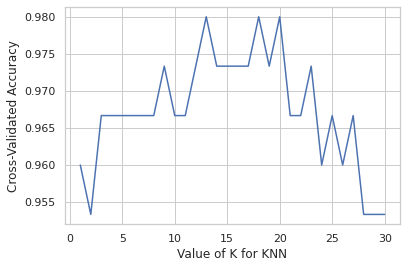

In [98]:
# ছবি আঁকতে হবে না? %matplotlib inline মানে হচ্ছে ছবিটা জুপিটার নোটবুকের ভেতরেই দেখাবে 
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# কে এর মান ফেললাম এক্স এক্সিসে, অ্যাক্যুরেসি ওয়াই এক্সিসে 
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [99]:
# "কে নিয়ারেস্ট নেইবার" সঙ্গে ১০ "কে ফোল্ড" ক্রস ভ্যালিডেশন
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.9800000000000001


In [101]:
# লজিস্টিক রিগ্রেশন সঙ্গে একই ১০ "কে ফোল্ড" ক্রস ভ্যালিডেশন
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver="lbfgs", max_iter=10000)
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.9733333333333334
